# Overall Strategy
- Use newsAPI to find companies that are trending (week 1)
- Use kaggle dataset to find patterns in stock trades (week 2)
- (week 3)
- Combine all strategies to make estimates on stocks that should be invested in.

*notes: using NASDAQ*

### Week 1

- NewsApi will search for articles that include the stock ticker
- Based on article count we know which companies are being talked about more
    - Hopefully in a good way (Will hopefully adjust for this later)
- Using top 50 Companies based on Market Cap
- Output includes company name + Article count
- Based on this we can invest in the companies being talked about the most.

In [47]:
!pip install spacy
!pip install newsapi-python
!pip install fsspec

In [4]:
#import libraries
from newsapi import NewsApiClient
import pandas as pd
import json
import csv

# top 50 traded Companies by Market CAP
# Limited to 50 since API only allows 100 request perday with free account
companies = ['Apple','Microsoft','Google','Alphabet','Amazon','Tesla','Facebook','Nvidia','Taiwan Semiconductor','JP Morgan',
             'Visa','Home Depot','Johnson & Johnson','United Health','ADI','Bank of America','Walmart','Alibaba','ASML Holding','Procter & Gamble',
             'Mastercard','Adobe','Netflix','NTES','CRM','Pfizer','Disney','Nike','Exxon','Novo',
             'Oracle','Toyota','Thermo','Eli Lilly','Comcast','Coca-Cola','Broadcom','Paypal','Accenture','Costco',
             'Cisco','PEPSI','Abbott Laboratories','Danaher','Chevron','Verizon','Shopify','Merck & Company','Qualcomm','AbbVie']

#Used for testing (ignore)
test_companies = ['AAPL','PEPSI','TSLA']

#Init
newsapi = NewsApiClient(api_key='3eaeabeef28c459d96502d7c196ac421')

In [5]:
article_results = []

for x in range(50):
    #used to filter searches that mention the stock market in realtion to company
    q = companies[x]+' NASDAQ'
    data = newsapi.get_everything(q=q,from_param='2021-11-12',
                                      to='2021-11-18', language='en', page_size=0)
    article_results.append(data['totalResults'])

list_of_results = list(zip(companies, article_results))
df = pd.DataFrame(list_of_results, columns = ['company','results'])
df.sort_values('results')
print(df)

                 company  results
0                  Apple      120
1              Microsoft       89
2                 Google      117
3               Alphabet       36
4                 Amazon      135
5                  Tesla      167
6               Facebook      332
7                 Nvidia       94
8   Taiwan Semiconductor        7
9              JP Morgan       10
10                  Visa       49
11            Home Depot      102
12     Johnson & Johnson       68
13         United Health      219
14                   ADI        5
15       Bank of America       87
16               Walmart      126
17               Alibaba       51
18          ASML Holding        1
19      Procter & Gamble        7
20            Mastercard       29
21                 Adobe        8
22               Netflix       19
23                  NTES       10
24                   CRM       16
25                Pfizer       39
26                Disney       36
27                  Nike       24
28            

In [125]:
df.to_excel("output.xlsx")

# Results from Day 1
 I ajdusted the names to be the full name. Just using the stock ticker name produced very little results for some. And some tickers produced un-realted results

# List
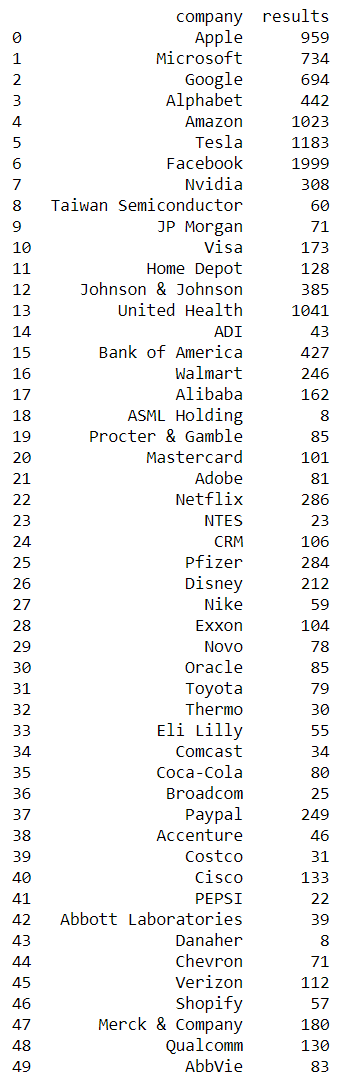

# Data
![avg.png](attachment:avg.png)

### Stock Buys
- Facebook had the most hits with 1999 
    - Bought 30k shares 11/18/21 (Pre-market)
- Tesla had 2 most with 1183
    - Bought 20k shares 11/18/21 (Pre-Market)
- United Health was 3rd with 1041
    - Bought 10k shares 11/18/21 (Pre-Market)

## Results after day 1
- My total gain is 2.58